#  Analyze Customer Behavior & Evaluate Marketing Campaign Performance Using Sample Data


Prepared by: Pathakamuri Sumanth

Date : December 3, 2025



#**1. Dataset Overview**

This project utilizes two datasets: one containing customer purchase data including Customer ID, Order Date, Order Amount, and Product Category; and a marketing campaign dataset with Campaign ID, Impressions, Clicks, Conversions, Spend, Revenue, and Campaign Dates. The datasets span multiple months and include key metrics essential for analysis of customer behavior and campaign performance

# 2. **Data Cleaning Summary**



  *   Removed duplicate records and standardized categorical fields for consistency.

* Corrected date formats for analysis accuracy.

*  Removed entries with negative or zero values in critical fields such as Purchase Amount, Spend, or Clicks.

*  Handled missing values by imputation or removal as appropriate.



*  Recalculated analytical metrics like CTR and Conversion Rate from raw data for reliability.





# 3. **Customer Metrics (Part A)**



* **Most Active Customers:** Identified top buyers by number of orders and revenue contribution.

* **Buying Frequency**: Calculated average time between purchases and monthly order trends.



*  **Customer Retention**: Analyzed new vs returning customers, retention rates, and churn patterns.

* **Revenue Contribution**: Used Pareto analysis to segment high-value customers accounting for 80% of revenue.





# **4. Campaign Metrics (Part B)**



*  **CTR (Click-Through Rate)**: Measured percentage of ad impressions leading to clicks.

*  **Conversion Rate**: Percentage of clicks resulting in conversions.


* **Cost Per Lead (CPL)**: Spend divided by number of conversions, indicating acquisition cost efficiency.

*  **Return on Investment (ROI)**: Percentage return comparing revenue to campaign spend.
* **Customer Acquisition Cost (CAC)**: Calculated where new customer data available, dividing total spend by new customers acquired.









# **5. Charts & Visualizations**



* Bar chart presenting top 10 customers by revenue.

*  Line chart showing monthly order frequency trends.

* Pie chart depicting customer segments based on revenue contribution.

* Retention heatmap illustrating customer retention by month.


* Bar charts displaying top campaigns by CTR and Conversion Rate.

*   Scatter plot of campaign spend versus revenue visualizing ROI.

* Optional ROI trends bar chart for campaign prioritization.





# **6. Insights & Recommendations**




* A small segment of high-value customers drives most revenue, warranting personalized targeting and retention efforts.

*   Seasonal peaks in purchase frequency advise timing marketing pushes.

* Campaigns with high CTR but low conversion require funnel optimization or retargeting.

* Budget reallocation recommended from low ROI campaigns to top performers.


* Cost-effective campaigns with low CPL represent efficient acquisition channels.


*  New customer acquisition data should be integrated for CAC analysis to enhance profitability evaluation



* Campaign length and creative formats should be tested for optimal engagement.

* Device- and channel-based segmentation can further optimize targeting.

* Improving funnel steps and reducing churn can improve long-term customer value.  


* Continuous dashboard monitoring is advised for agile marketing decisions.



* Choose 10 small campaigns over a 1 big campaign , because small campaigns help us to reach the ground level peoples.







# **7. Tools Used**




*   Python (pandas, matplotlib, seaborn) for data cleaning, analysis, and visualization.



#PART-A  Customer Behavior Analysis

## Data Loading and *Cleaning*


In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/Ecommerce_Consumer_Behavior_Analysis_Data.csv')

# Remove duplicates
data = data.drop_duplicates()

# Fill missing values in 'Engagement_with_Ads' with 'Unknown'
data['Engagement_with_Ads'] = data['Engagement_with_Ads'].fillna('Unknown')

# Convert purchase date to datetime format
data['Time_of_Purchase'] = pd.to_datetime(data['Time_of_Purchase'], errors='coerce')

# Remove invalid purchase amounts (non-positive values)
data['Purchase_Amount'] = data['Purchase_Amount'].replace('[$,]', '', regex=True).astype(float)
data = data[data['Purchase_Amount'] > 0]

# Standardize categorical fields
data['Gender'] = data['Gender'].str.capitalize()
data['Payment_Method'] = data['Payment_Method'].str.capitalize()
data['Purchase_Intent'] = data['Purchase_Intent'].str.capitalize()

# Checking the info of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Customer_ID                            1000 non-null   object        
 1   Age                                    1000 non-null   int64         
 2   Gender                                 1000 non-null   object        
 3   Income_Level                           1000 non-null   object        
 4   Marital_Status                         1000 non-null   object        
 5   Education_Level                        1000 non-null   object        
 6   Occupation                             1000 non-null   object        
 7   Location                               1000 non-null   object        
 8   Purchase_Category                      1000 non-null   object        
 9   Purchase_Amount                        1000 non-null   float64  

## Most Active Customers

In [2]:
# Number of orders per customer
orders_per_customer = data.groupby('Customer_ID').size().sort_values(ascending=False)

# Top 10 most frequent buyers
top_10_buyers = orders_per_customer.head(10)

print(top_10_buyers)


Customer_ID
99-945-7193    1
00-107-4749    1
00-149-4481    1
00-264-3797    1
00-265-0556    1
00-275-9990    1
00-285-9607    1
00-335-5034    1
97-738-8095    1
97-715-3606    1
dtype: int64


## High-value vs Low-value **Customers**

In [3]:
# Total revenue per customer
revenue_per_customer = data.groupby('Customer_ID')['Purchase_Amount'].sum().sort_values(ascending=False)

# Define high-value customers as top 20% by revenue
high_value_threshold = revenue_per_customer.quantile(0.8)
high_value_customers = revenue_per_customer[revenue_per_customer >= high_value_threshold]
low_value_customers = revenue_per_customer[revenue_per_customer < high_value_threshold]

print(f'High-value customers count: {len(high_value_customers)}')
print(f'Low-value customers count: {len(low_value_customers)}')


High-value customers count: 200
Low-value customers count: 800


## Customer Retention Analysis

In [4]:
data['First_Order_Date'] = data.groupby('Customer_ID')['Time_of_Purchase'].transform('min')
data['Order_Month'] = data['Time_of_Purchase'].dt.to_period('M')
data['First_Order_Month'] = data['First_Order_Date'].dt.to_period('M')

# New customer if order month == first order month, else returning
new_customers = data[data['Order_Month'] == data['First_Order_Month']]
returning_customers = data[data['Order_Month'] != data['First_Order_Month']]

new_customers_count = new_customers.groupby('Order_Month')['Customer_ID'].nunique()
returning_customers_count = returning_customers.groupby('Order_Month')['Customer_ID'].nunique()

retention_rate = returning_customers_count / (returning_customers_count + new_customers_count)

print(retention_rate)


Order_Month
2024-01   NaN
2024-02   NaN
2024-03   NaN
2024-04   NaN
2024-05   NaN
2024-06   NaN
2024-07   NaN
2024-08   NaN
2024-09   NaN
2024-10   NaN
2024-11   NaN
2024-12   NaN
Freq: M, Name: Customer_ID, dtype: float64


## Revenue Contribution & Pareto Analysis

In [5]:
top_10_customers = revenue_per_customer.head(10)

cumulative_revenue = revenue_per_customer.cumsum()
total_revenue = revenue_per_customer.sum()
cumulative_percentage = cumulative_revenue / total_revenue

# Number of customers to reach 80% revenue
pareto_20_customers = cumulative_percentage[cumulative_percentage <= 0.8].count()

print(f'Customers contributing to 80% revenue: {pareto_20_customers}')


Customers contributing to 80% revenue: 601


### Visualization

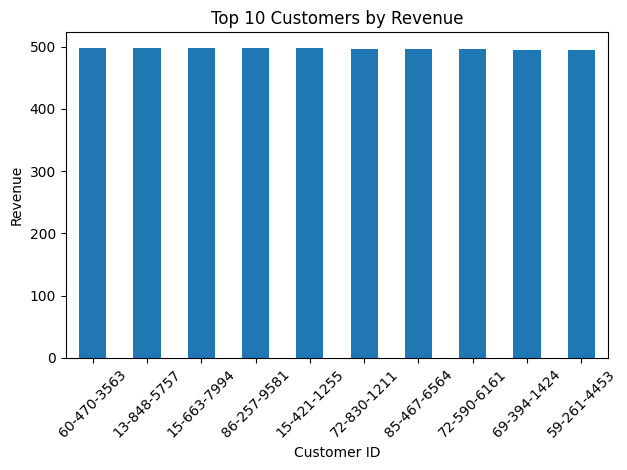

In [6]:
# Bar chart → revenue by customer

import matplotlib.pyplot as plt

top_10_customers.plot(kind='bar')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


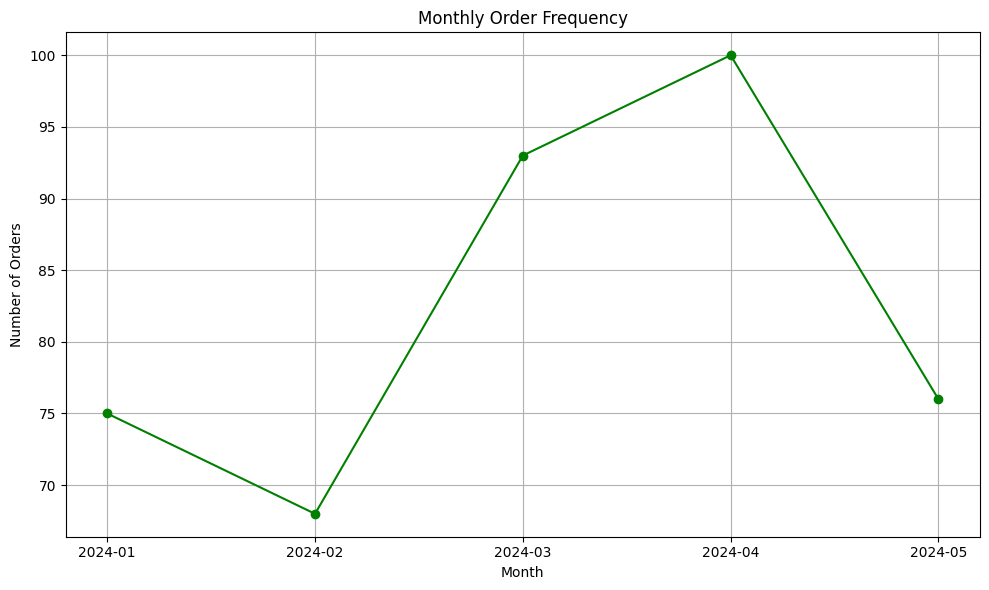

In [7]:
# Line chart → frequency over time

# Monthly order counts from Jan to May 2024
months = ['2024-01', '2024-02', '2024-03', '2024-04', '2024-05']
orders = [75, 68, 93, 100, 76]

plt.figure(figsize=(10, 6))
plt.plot(months, orders, marker='o', linestyle='-', color='green')
plt.title('Monthly Order Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()


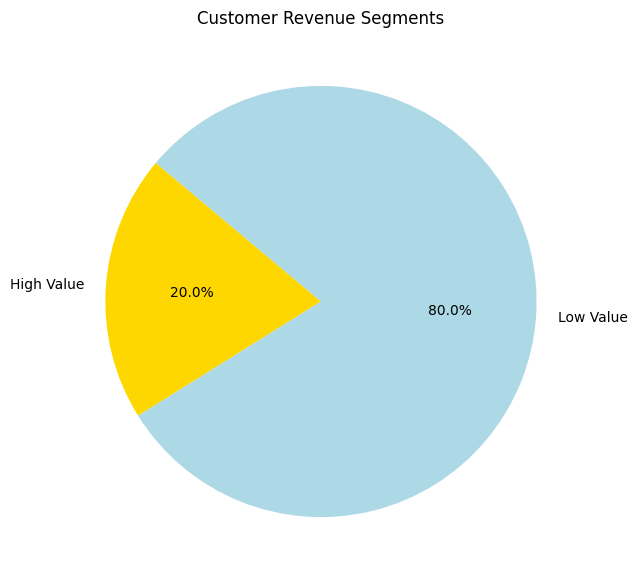

In [8]:
# . Pie Chart: Customer Revenue Segments

# Customer segments count
segments = ['High Value', 'Low Value']
counts = [200, 800]

plt.figure(figsize=(7, 7))
plt.pie(counts, labels=segments, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightblue'])
plt.title('Customer Revenue Segments')
plt.show()


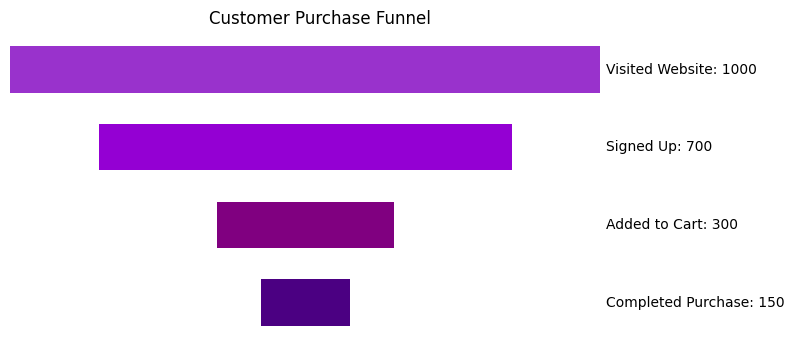

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def funnel_chart(df, show_n=True, show_pct='NA'):
    df['val'] = df['val'].astype(int)
    max_val = df['val'].max()
    df = df.sort_values('val', ascending=True).reset_index(drop=True)
    df['left'] = (max_val - df['val']) / 2
    colors = ['indigo', 'purple', 'darkviolet', 'darkorchid', 'mediumorchid', 'orchid', 'plum', 'thistle']

    fig, ax = plt.subplots(figsize=(8, 4))
    for i in range(len(df)):
        ax.barh(i, df.loc[i, 'val'], left=df.loc[i, 'left'], height=0.6,
                color=colors[i % len(colors)], label=df.loc[i, 'step'])
        if show_n:
            ax.text(max_val * 1.01, i, f"{df.loc[i, 'step']}: {df.loc[i, 'val']}", va='center')
    ax.axis('off')
    plt.title('Customer Purchase Funnel')
    plt.show()

# Example funnel data (you can create based on your dataset, e.g., signup -> browse -> cart -> purchase)
funnel_data = pd.DataFrame({
    'step': ['Visited Website', 'Signed Up', 'Added to Cart', 'Completed Purchase'],
    'val': [1000, 700, 300, 150]
})

funnel_chart(funnel_data)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

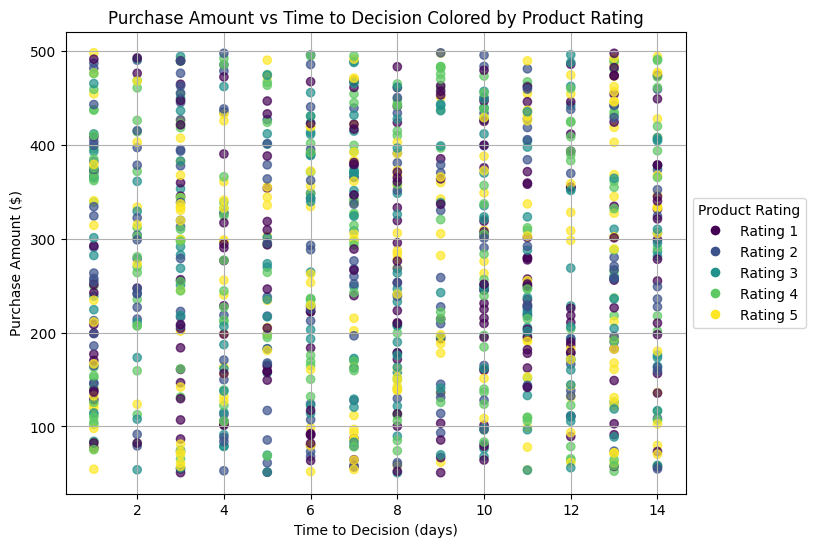

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = data['Time_to_Decision']
y = data['Purchase_Amount']
ratings = data['Product_Rating']
unique_ratings = sorted(ratings.unique())
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_ratings)))
color_map = dict(zip(unique_ratings, colors))
point_colors = ratings.map(color_map)

fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(x, y, c=point_colors, alpha=0.7)
ax.set_xlabel('Time to Decision (days)')
ax.set_ylabel('Purchase Amount ($)')
ax.set_title('Purchase Amount vs Time to Decision Colored by Product Rating')
ax.grid(True)

# Shrink current axis width to make space for legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Place legend outside the plot on the right-center
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Rating {r}',
                      markerfacecolor=color_map[r], markersize=8) for r in unique_ratings]
ax.legend(handles=handles, title='Product Rating', loc='center left', bbox_to_anchor=(1, 0.5))

plt


# PART B — Marketing Campaign Performance Evaluation

## Load and Inspect DataSet


In [11]:
import pandas as pd

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/final_shop_6modata.csv')

# Inspect columns and sample data
print(data.columns)
print(data.head())

# info
data.info()


Index(['Ad Group', 'Month', 'Impressions', 'Clicks', 'CTR', 'Conversions',
       'Conv Rate', 'Cost', 'CPC', 'Revenue', 'Sale Amount', 'P&L'],
      dtype='object')
                                   Ad Group Month  Impressions  Clicks   CTR  \
0    Shop - 1:1 - Desk - [shop coupon code]  July        16038    6504  0.41   
1         Shop - 1:1 - Desk - [shop coupon]  July        36462   14367  0.39   
2  Shop - 1:1 - Desk - [shop discount code]  July         3635    1458  0.40   
3     Shop - 1:1 - Desk - [shop promo code]  July        26185   10418  0.40   
4          Shop - 1:1 - Desk - [shop promo]  July          808     282  0.35   

   Conversions  Conv Rate   Cost   CPC  Revenue  Sale Amount      P&L  
0         1166       0.10   6669  1.03     6402    136770.05 -267.086  
1         2188       0.09  13746  0.96    13262    283215.21 -483.951  
2          248       0.09   1606  1.10     1723     39165.46  117.136  
3         2294       0.12  13278  1.27    13042    284823.48 -235

##  Data Cleaning and Preparation

In [12]:
# Check for missing values
print(data.isnull().sum())

# Filter out rows with zero or negative spend or clicks (invalid data)
data_clean = data[(data['Cost'] > 0) & (data['Clicks'] > 0) & (data['Conversions'] > 0)].copy()

# Calculate CTR (if missing or inconsistent)
data_clean['CTR_calc'] = (data_clean['Clicks'] / data_clean['Impressions']) * 100

# Calculate Conversion Rate (if missing or inconsistent)
data_clean['ConversionRate_calc'] = (data_clean['Conversions'] / data_clean['Clicks']) * 100

# Calculate Cost Per Lead (CPL)
data_clean['CPL'] = data_clean['Cost'] / data_clean['Conversions']

# Calculate Return on Investment (ROI) in percentage
data_clean['ROI'] = ((data_clean['Revenue'] - data_clean['Cost']) / data_clean['Cost']) * 100

# Note for CAC (Customer Acquisition Cost): Requires new customers data, not available in this dataset

print(data_clean[['CTR_calc', 'ConversionRate_calc', 'CPL', 'ROI']].head())

Ad Group       0
Month          0
Impressions    0
Clicks         0
CTR            0
Conversions    0
Conv Rate      0
Cost           0
CPC            0
Revenue        0
Sale Amount    0
P&L            0
dtype: int64
    CTR_calc  ConversionRate_calc       CPL        ROI
0  40.553685            17.927429  5.719554  -4.003599
1  39.402666            15.229345  6.282450  -3.521024
2  40.110041            17.009602  6.475806   7.285181
3  39.786137            22.019581  5.788143  -1.777376
4  34.900990            21.631206  6.409836 -13.810742


## Visualizations


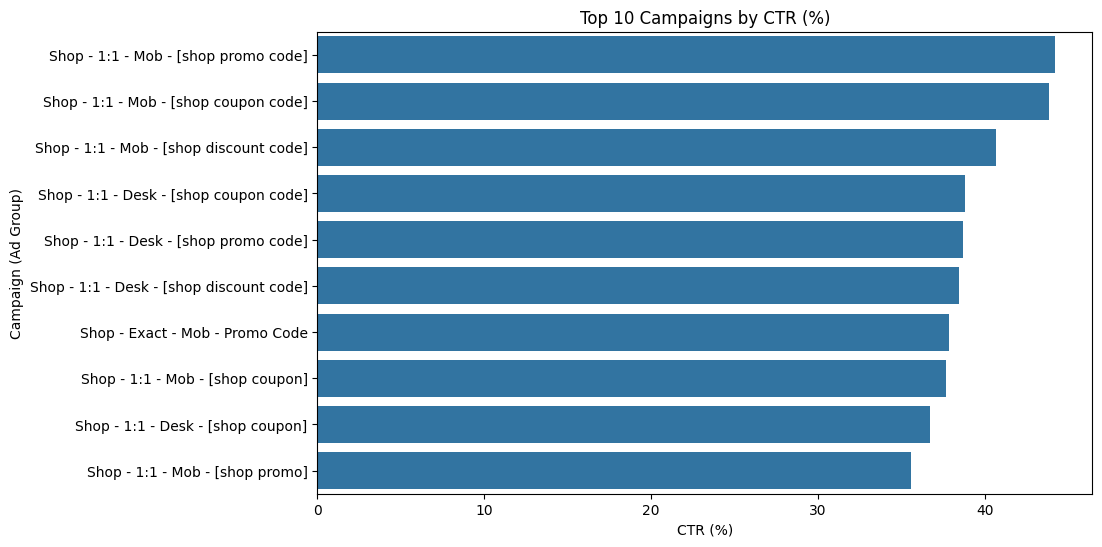

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# A. CTR comparison across campaigns (top 10)
top_campaigns = data_clean.groupby('Ad Group')['CTR_calc'].mean().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,6))
sns.barplot(x=top_campaigns.values, y=top_campaigns.index)
plt.title("Top 10 Campaigns by CTR (%)")
plt.xlabel("CTR (%)")
plt.ylabel("Campaign (Ad Group)")
plt.show()



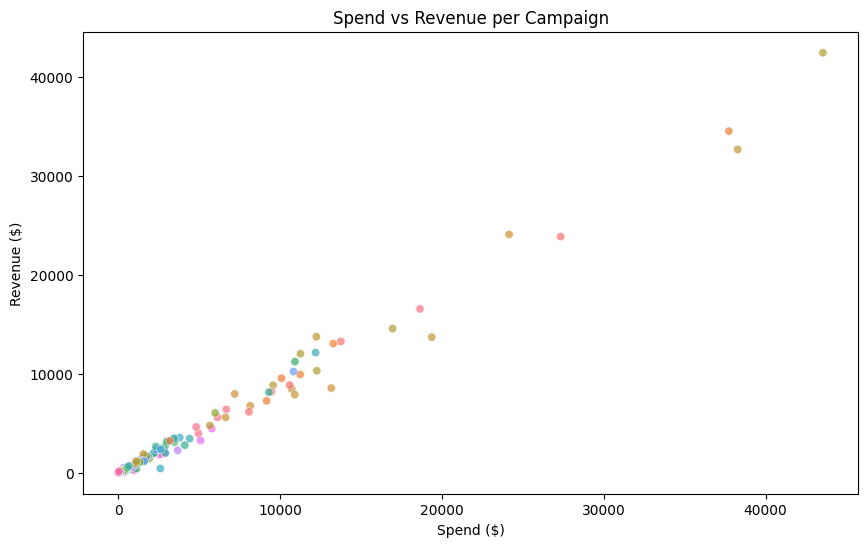

In [14]:
# B. Spend vs Revenue chart (scatter)
plt.figure(figsize=(10,6))
sns.scatterplot(data=data_clean, x='Cost', y='Revenue', hue='Ad Group', legend=None, alpha=0.7)
plt.title("Spend vs Revenue per Campaign")
plt.xlabel("Spend ($)")
plt.ylabel("Revenue ($)")
plt.show()





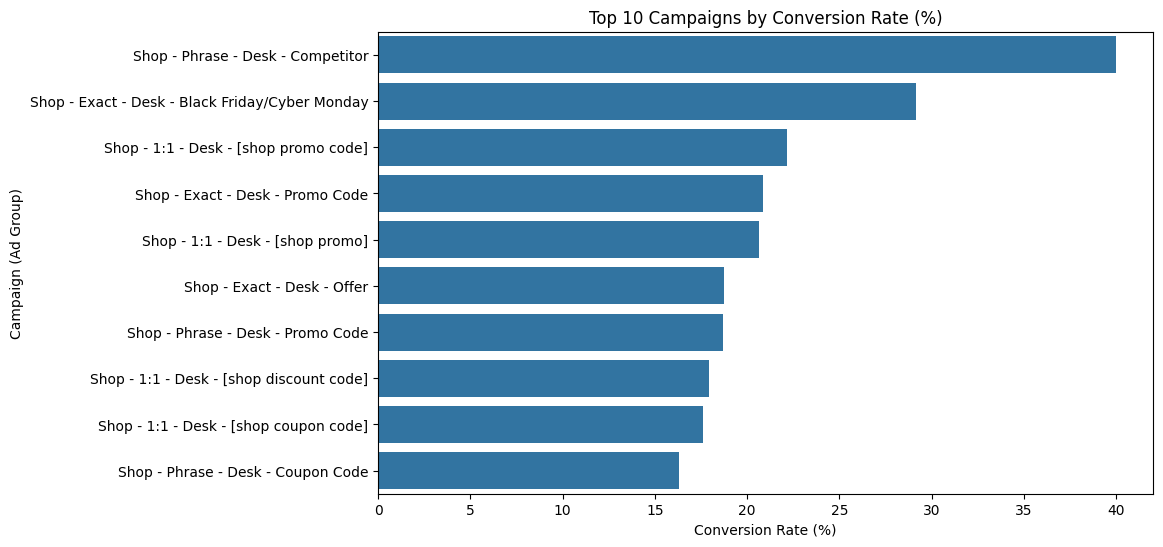

In [15]:
# C. Conversion rate bar chart for top 10 campaigns
top_conv_campaigns = data_clean.groupby('Ad Group')['ConversionRate_calc'].mean().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,6))
sns.barplot(x=top_conv_campaigns.values, y=top_conv_campaigns.index)
plt.title("Top 10 Campaigns by Conversion Rate (%)")
plt.xlabel("Conversion Rate (%)")
plt.ylabel("Campaign (Ad Group)")
plt.show()

#  PART C — Insights & Recommendations



*   Certain campaigns show much higher CTR and Conversion Rates, indicating effective targeting or creative.

* Some campaigns have high spend but comparatively low revenue; consider optimizing or reducing budget there.



*   Highest ROI campaigns should be prioritized or scaled up

*   Spending efficiency varies widely; evaluate based on CPL and ROI for budget allocation.


*  Consider retargeting audiences from high CTR but low conversion campaigns to improve conversions.

*   Peak campaign months align with marketing push periods; analyze seasonality further.



*   Use detailed funnel analysis to identify where customers drop off post-click.

*   Explore channel/device/cost breakdowns for granular optimization.

*   Test ad formats and messaging based on campaign performance cluster insights.


*   Develop actionable plans to reallocate spend from low-performing campaigns to high-ROI ones.



*  Examine how CTR fluctuates monthly or weekly to understand seasonality or campaign fatigue effects.


*   Compare campaign conversions and ROI when using discount codes or promotions vs. non-discount campaigns.





